# Audio Utilities
Useful examples for loading, generating and manipulating audio data

## Getting started

To begin using the python module, first ensure the requirements are installed, then import the Audio module itself.

In [1]:
!pip install -q -r requirements.txt
from ml_utilities import Audio

## Loading Audio files

Pass the path to the audio file to the load_audio method, and a new Audio object instance will load the audio data.

In [2]:
audio = Audio.load_audio('audio/0cqg2z78itgi_44160250_11_303.wav')


# Viewing the audio metadata

In [3]:
print(f'Samples in audio data: {audio.samples}')
print(f'Sample rate of audio: {audio.sample_rate}')
print(f'Basic audio statistics: {audio.get_statistics()}')
print(f'Filename: {audio.source_path}')
print(f'Operations on audio:{audio.operations}')

Samples in audio data: 750000
Sample rate of audio: 250000
Basic audio statistics: {'Mean amplitude': -1.5567179361979166e-05, 'Max amplitude': 0.04974365234375, 'Min amplitude': -0.0465087890625, 'Samples': 750000, 'Sample rate': 250000, 'Duration': 3.0, 'Mean norm': 0.0008755757242838542, 'RMS amplitude': 0.00244775923322454}
Filename: audio/0cqg2z78itgi_44160250_11_303.wav
Operations on audio:['load audio/0cqg2z78itgi_44160250_11_303.wav']


## Visualize the waveform

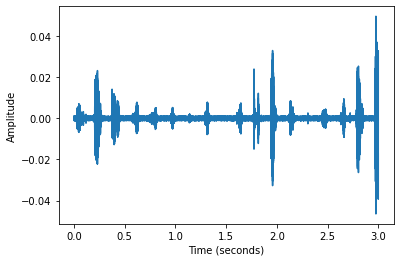

In [4]:
audio.plot_waveform()

## Visualize the Spectrogram

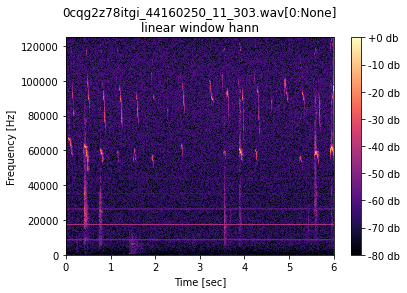

In [5]:
audio.plot_linear_spectrogram()

# Manipulating the Audio data

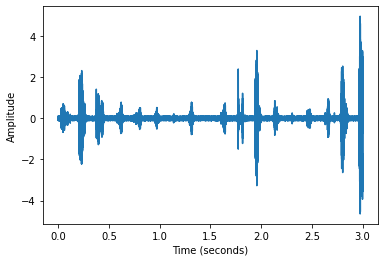

In [6]:
# Increasing Gain of Audio (Multiply)
audio.gain(100.0,'multiply').plot_waveform()

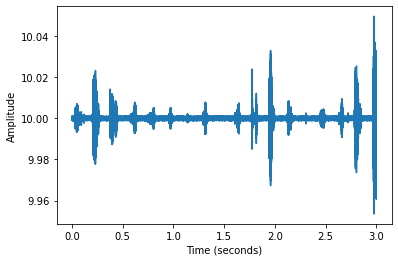

In [7]:
# Increase Gain of the Audio (Additive)
audio.gain(10,'additive').plot_waveform()

## Pitch Shifting and Time Stretching

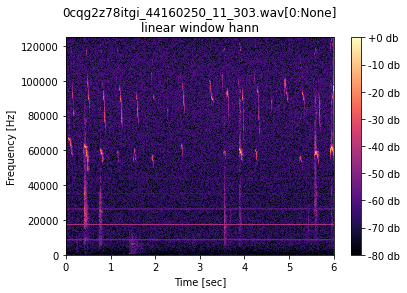

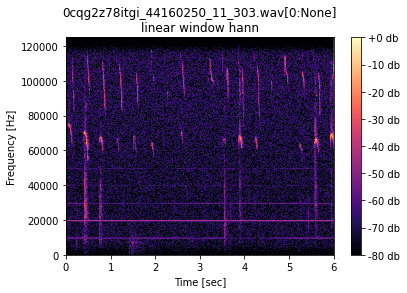

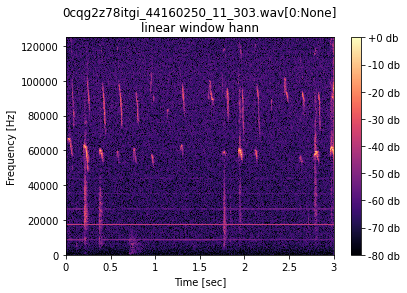

In [8]:
audio.plot_linear_spectrogram()
# Pitch shifting increases or decreases the frequency of the audio, but does not modify the length of the audio clip
audio.pitch_shift(2).plot_linear_spectrogram()
# Time stretching increases or decreases the length of the audio clip, but does not modify the frequency of the audio
audio.time_stretch(2).plot_linear_spectrogram()

# Generate Audio
Simple tone generation is available in the module, to create sinusoidal, square or sawtooth waveforms.  These can be quickly used to modify other audio, by mixing.

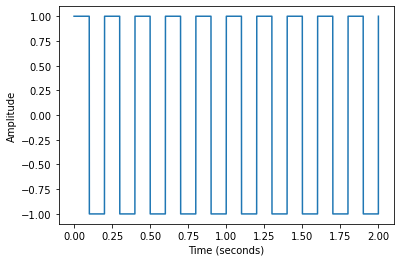

In [9]:
sample_rate = 5000 # samples per second
samples = 2 * sample_rate # total samples to generate
freq = 5 # Hz
shape = 'square' # other options include 'sawtooth' and 'sine'
square_tone = Audio.load_tone(freq, samples,'square',sample_rate)

square_tone.plot_waveform()

## Mixing and trimming audio 
Simple mixing of two equal length samples can be achieved using mix.  
To get samples to be the same length, use the trim operation, which works on the sample length of the audio data.

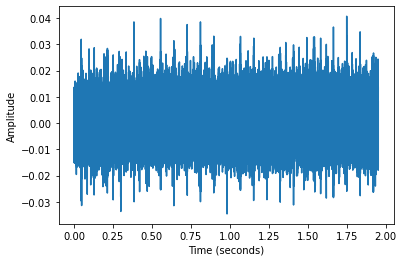

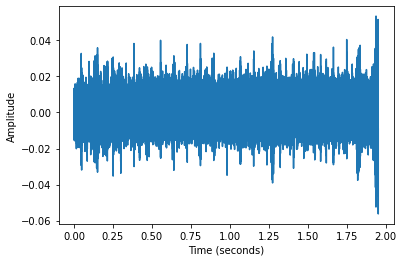

In [10]:
background = Audio.load_audio('audio/20200428_091053.wav')

# Trim audio
trim_background = background.trim(0, audio.samples)
trim_background.plot_waveform()

# Mix the Audio, where left and right determine a coefficient to premultiply each signal before the mix.
left = 1.0
right = 1.0
mode = 'additive' # options include multiply, additive, subtractive
trim_background.mix(audio, left, right, mode).plot_waveform()

# Sampling an Audio file with a bounding box

Useful technique to get a single sample of audio, for blending into another audio file

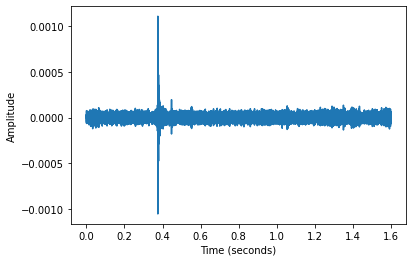

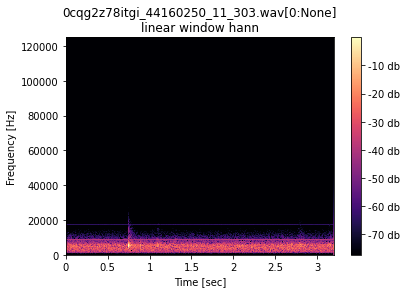

In [11]:
start_seconds = 1.4
stop_seconds = 3.2
length_seconds = stop_seconds - start_seconds

low_freq = 2000
high_freq = 6000
height_freq = high_freq - low_freq
sample = audio.get_sample_box(start_seconds, low_freq, length_seconds, height_freq)
sample.plot_waveform()
sample.plot_linear_spectrogram()

# Bandpass filters 
Useful for excluding or including audio in a range

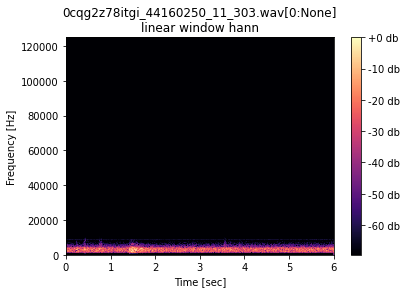

In [12]:
audio.butter_bandpass_filter(low_freq, height_freq).plot_linear_spectrogram()

# Operation tracking

Each audio object contains the audio data of the waveform.  Performing multiple operations in a chain results in multiple copies of that audio waveform.  Whilst this is not memory efficient, the trade off is traceability, which ensures that repeat operations can be made independently on an Audio object instance.

Tracking these operations is handled internally, in the Audio.operations attribute, which is an array containing all the operations on that data.  As a result, it is possible to recreate an audio record, by repeating the operations.

In [13]:
print(audio.operations)
print(audio.pitch_shift(4).operations)
print(audio.time_stretch(0.5).gain(-2,'multiply').operations)

['load audio/0cqg2z78itgi_44160250_11_303.wav']
['load audio/0cqg2z78itgi_44160250_11_303.wav', '[pitch_shift 4]']
['load audio/0cqg2z78itgi_44160250_11_303.wav', '[time_stretch 0.5]', 'gain[-2,multiply]']
